<IPython.core.display.Javascript object>


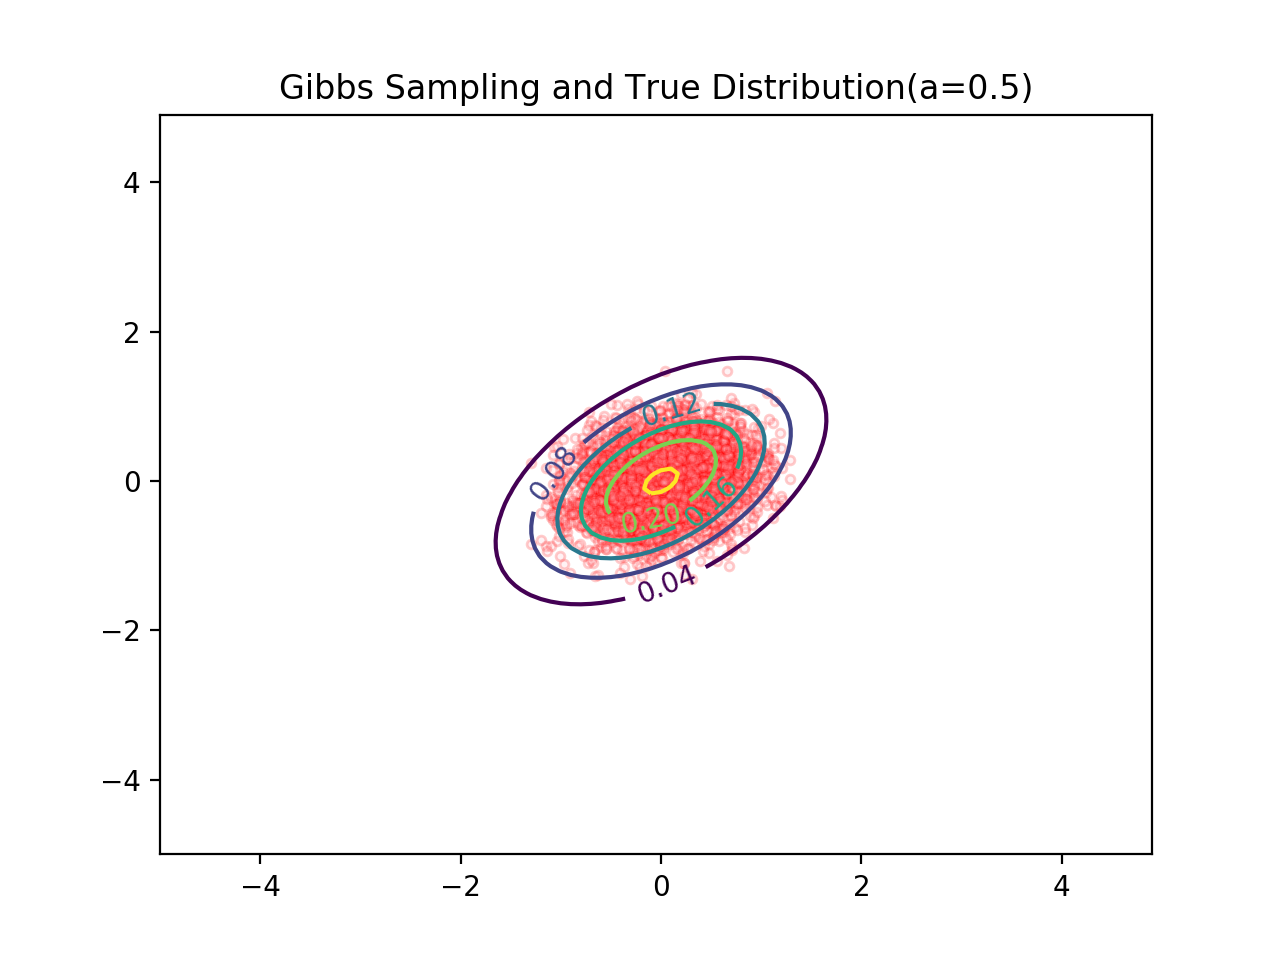

In [1]:
%matplotlib notebook
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

a = 0.5

# print a true gauss distribution
def gauss(x, y, a):
    def _gauss(x, y):
        """Multivariate normal distribution (two variables)"""
        mu = np.array([0, 0])
        sigma = (1 - a*a) * np.array([[1 , a],
                                      [a,  1]])
        det = np.linalg.det(sigma)
        inv_sigma = np.linalg.inv(sigma)

        x_c = np.array([x, y]) - mu
        return np.exp(- x_c.dot(inv_sigma).dot(x_c[np.newaxis, :].T) / 2.0) / (2*np.pi*np.sqrt(det))
    z = np.vectorize(_gauss)(x, y)
    return z

t = np.arange(-5, 5, 0.1)
x, y =np.meshgrid(t, t)
z = gauss(x, y, a)

plt.title('Gibbs Sampling and True Distribution(a={})'.format(a))
c = plt.contour(x, y, z)
c.clabel(fmt='%1.2f', fontsize=10)

# try gibbs sampling
def gibbs_sampling(a, step, burn_in):
    x = np.zeros(2) # initial x
    samples = np.array(x)
    for i in range(step):
        denomi = 1 / np.sqrt(2*np.pi)
        x[0] = denomi * np.random.normal(a*x[1], 1)
        samples = np.append(samples, (x))
        x[1] = denomi * np.random.normal(a*x[0], 1)
        samples = np.append(samples, (x))
    samples = samples.reshape((2*step+1, x.shape[0]))
    return samples

step = 3000
burn_in = 1000
samples = gibbs_sampling(a, step, burn_in)
plt.scatter(samples[burn_in:, 0], samples[burn_in:, 1], s=10, c='pink', alpha=0.2, edgecolor='red')


plt.show()